<a href="https://colab.research.google.com/github/cbernet/introduction_machine_learning/blob/master/notebooks/supervised_learning/logistic_regression_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this tutorial 

Previously, we have built  a very simple neural network with only one neuron to classify a 1D sample in two categories, and we saw that this network is equivalent to a logistic regression. We also learnt about the sigmoid activation function. 

Now, we're going to perform the same exercise in 2D, and you will learn that: 

* the logistic regression can work in 2D as well, and in more dimensions;
* the logistic regression is **a linear algorithm**;
* it is often necessary to add **non-linearities** to the model to be able to describe the dataset, and thus to go beyond the logistic regression. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# in this tutorial, we will generate our samples ourselves, 
# with nsamples in each category
nexamples = 500

## Dataset creation

Let's create a sample of examples with two values x1 and x2, with two categories. 
For category 0, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width = 1 along both directions. For category 1, the Gaussian is centered on (2,2). We assign label 0 to category 0, and label 1 to category 1.

In [3]:
normal = np.random.multivariate_normal
# squared width:
s2 = 1
# below, we provide the coordinates of the mean as 
# a first argument, and then the covariance matrix
# we generate nexamples examples for each category
sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nexamples)
sgx1 = normal([2.,2.], [[s2, 0.], [0.,s2]], nexamples)
# setting the labels for each category
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

Here is a scatter plot for the examples in the two categories

Text(0, 0.5, 'x2')

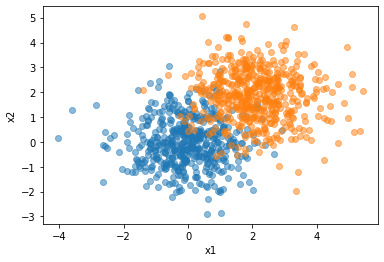

In [5]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

Our goal is to train a logistic regression to classify (x1,x2) points in one of the two categories depending on the values of x1 and x2. To do this training, we need to build a single sample containing the examples from the two categories. So we concatenate the arrays of points, and also the arrays of labels for later use:

In [6]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))

print(sgx.shape, sgy.shape)

(1000, 2) (1000,)


**Exercise** 

* Use `scikit_learn.datasets.make_blob` to generate the same dataset in an easy, single line.
* Plot the dataset with `pyplot.scatter`, with a different color for the two categories

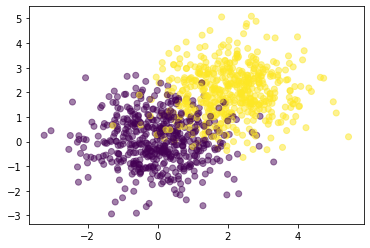

In [14]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=nexamples*2, centers=((0,0),(2,2)))
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5)

## The 2D sigmoid function 

The sigmoid or logistic function is essential in binary classification problems. It is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like in 1D:

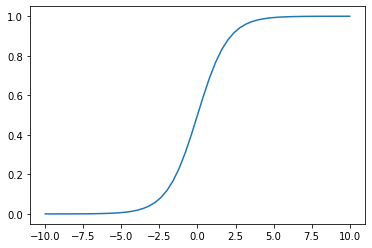

In [15]:
# define parameters
# the bias: 
b = 0
# the weight: 
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

In 2D, the expression of the sigmoid remains the same, but $z$ is now a function of the two variables $x_1$ and $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

And here is the code for the 2D sigmoid:

In [16]:
# define parameters
# bias: 
b = 0
# x1 weight: 
w1 = 1
# x2 weight:
w2 = 2

def sigmoid_2d(x1, x2):
    # z is a linear function of x1 and x2
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

To see what this function looks like, we can make a 2D plot, with x1 on the horizontal axis, x2 on the vertical axis, and the value of the sigmoid represented as a color for each (x1, x2) coordinate. To do that, we will use a standard matplotlib technique. Since this technique is a bit involved, I'd like to explain it in details. 

First create an array of evenly spaced values along x1, and another array along x2. Taken together, these arrays will allow us to map the (x1,x2) plane. 

In [17]:
xmin, xmax, npoints = (-6,6,51)
linx1 = np.linspace(xmin,xmax,npoints)
# no need for a new array, we just reuse the one we have
# with another name: 
linx2 = linx1

Then, we create a **meshgrid** from these arrays: 

In [18]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
print(gridx1.shape, gridx2.shape)
print('gridx1:')
print(gridx1) 
print('gridx2')
print(gridx2)

(51, 51) (51, 51)
gridx1:
[[-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 ...
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]]
gridx2
[[-6.   -6.   -6.   ... -6.   -6.   -6.  ]
 [-5.76 -5.76 -5.76 ... -5.76 -5.76 -5.76]
 [-5.52 -5.52 -5.52 ... -5.52 -5.52 -5.52]
 ...
 [ 5.52  5.52  5.52 ...  5.52  5.52  5.52]
 [ 5.76  5.76  5.76 ...  5.76  5.76  5.76]
 [ 6.    6.    6.   ...  6.    6.    6.  ]]


if you take the first line in both arrays, and scan the values on this line, you get: `(-6,-6), (-5.76, -6), (-5.52, -6)`... So we are scanning the x1 coordinates sequentially at the bottom of the plot. If you take the second line, you get: `(-6, -5.76), (-5.76, -5.76), (-5.52, -5.76)` ... : we are scanning the second line at the bottom of the plot, after moving up in x2 from one step. 

Scanning the full grid, you would scan the whole plot sequentially. 

Now we need to compute the value of the sigmoid for each pair (x1,x2) in the grid. That's very easy to do with the output of `meshgrid`: 

In [19]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

numpy applies its magic and calls the `sigmoid_2d` function to each pair `(x1,y2)` taken from the `gridx1` and `gridx2` arrays. 

Finally, we can plot our sigmoid in 2D: 

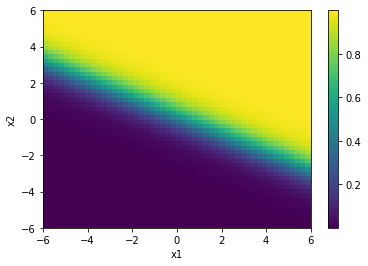

In [20]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

The 2D sigmoid has the same kind of rising edge as the 1D sigmoid, but in 2D. 

**Exercise**

With the parameters defined above: 

* The weight of $x_2$ is twice larger than the weight of $x_1$, so the sigmoid evolves twice faster as a function of $x_2$. If you set one of the weights to zero, can you guess what will happen? You can test by editing the function `sigmoid_2d`, before re-executing the above cells. 
* The separation boundary, which occurs for $z=0$, is a straight line with equation $w_1 x_1 + w_2 x_2 + b = 0$. Or equivalently: 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$

Please verify on the plot above that this equation is indeed the one describing the separation boundary. 

* Now try and change the bias to see what happens

Note that if you prefer, you can plot the sigmoid as a 3D surface like this:  


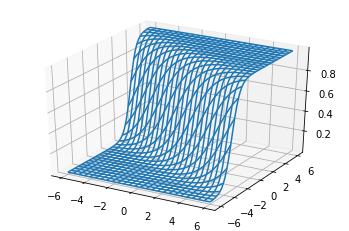

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(gridx1,gridx2,z)

## Logistic regression

Let's now train a logistic regression to separate the two classes of examples. The goal of the training will be to use the existing examples to find the optimal values for the parameters $w_1, w_2, b$. 

We take the logistic regression algorithm from scikit-learn. 
Here, the logistic regression is used with the `lbfgs` solver. LBFGS is the minimization method used to find the best parameters, and it is similar to [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization).

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(sgx, sgy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The logistic regression has been fitted (trained) to the data. Now, we can use it to predict the probability for a given (x1,x2) point to belong to category 1.

We would like to plot this probability in 2D as a function of x1 and x2. To do that, we need to use the `clf.predict_proba` method which takes a 2D array of shape `(n_points, 2)`. The first dimension indexes the points, and the second one contains the values of x1 and x2. Again, we use our grid to map the (x1,x2) plane. But the gridx1 and gridx2 arrays defined above contain disconnected values of x1 and x2: 

In [23]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


What we want is a 2D array of shape `(n_points, 2)`, not two 2D arrays of shape (51, 51)... 
So we need to reshape these arrays. First, we will flatten the gridx1 and gridx2 arrays so that all their values appear sequentially in a 1D array. Here is a small example to show how flatten works: 

In [24]:
a = np.array([[0, 1], [2, 3]])
print(a) 
print('flat array:', a.flatten())

[[0 1]
 [2 3]]
flat array: [0 1 2 3]


Then, we will stitch the two 1D arrays together in two columns with np.c_ like this: 

In [25]:
b = np.array([[4, 5], [6, 7]])
print(a.flatten())
print(b.flatten())
c = np.c_[a.flatten(), b.flatten()]
print(c)
print(c.shape)

[0 1 2 3]
[4 5 6 7]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
(4, 2)


This array has exactly the shape expected by `clf.predict_proba`: a list of examples with two values. So let's do the same with our meshgrid, and let's compute the probabilities for all (x1,x2) pairs in the grid:

In [26]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

Now, prob does not have the right shape to be plotted. Below, we will use a gridx1 and a gridx2 array with shapes (51,51). The shape of the prob array must also be (51,51), as the plotting method will simply map each (x1,x2) pair to a probability. So we need to reshape our probability array to shape (51,51). Reshaping works like this:

In [27]:
d = np.array([0,1,2,3])
print(d)
print('reshaped to (2,2):')
print(d.reshape(2,2))

[0 1 2 3]
reshaped to (2,2):
[[0 1]
 [2 3]]


💡 **This kind of numpy array reshaping operations might seem a bit convoluted at first. But I can assure you that you actually get used to it. Always check the shape of your arrays and stay strong!**

Finally (!) we can do our plot:

Text(0, 0.5, 'x2')

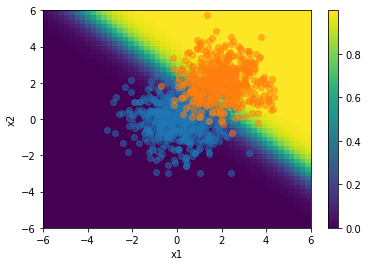

In [ ]:
# note that prob[:,1] returns, for all exemples,
# the probability p to belong to category 1. 
# prob[:,0] would return the probability to belong 
# to category 0 (which is 1-p)
plt.pcolor(gridx1,gridx2,prob[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')


We see that the logistic regression is able to separate these two classes well. 

But what about more complicated sample distributions? 

## A non-linear problem 

Let's build a more complicated sample, in which: 

* the examples are drawn randomly according to a uniform distribution in the (x1,x2) plane
* an example is assigned to category 0 is the product x1*x2 is positive, and to category 1 otherwise.

You'll see a scatter plot of the sample below. 

In [28]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)

In [29]:
# stacking the x1, x2 values 
# into an array of shape (nexamples, 2)
# this array contains the examples of 
# both categories, so all examples
# in the plane
srx = np.column_stack((x1, x2))
# select examples for category 0
srx0 = srx[x1*x2>=0]
# select examples for category 1
srx1 = srx[x1*x2<0]

Text(0, 0.5, 'x2')

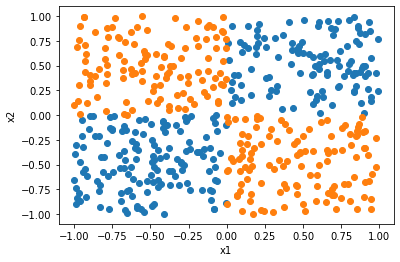

In [30]:
plt.scatter(srx0[:,0],srx0[:,1])
plt.scatter(srx1[:,0],srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Obviously, we cannot draw a line separating these two categories accurately, so the logistic regression is going to be of no use!

**This is a non-linear problem**. 

To be able to deal with non-linearities, the classification boundary must be a non-linear function of the inputs x1 and x2. This means that the weighted input of the last sigmoid neuron must be a non-linear function of x1 and x2. 

To do that, we have two solutions, and we are going to try both:

* change variables, which requires some insights on the dataset
* use a more complex model, like a neural network with one or more hidden layers. 

## Changing variables

We're first going to try and change variables. Looking at the plot above (and also at the code used to generate the examples!), we see that the sample categorization depends on the product $x_1 x_2$.

Indeed, for the first category, ($x_1 > 0$ and $x_2 > 0$), or ($x_1 < 0$ and $x_2 < 0$). So the product $x_1 x_2$ is always positive. For the second category, it's always negative. 

So instead of considering $x_1$ and $x_2$ separately, we can work with $u = x_1 x_2$, which is a non-linear combination of $x_1$ and $x_2$.

We build the examples as a function of $u$:

Text(0, 0.5, 'category')

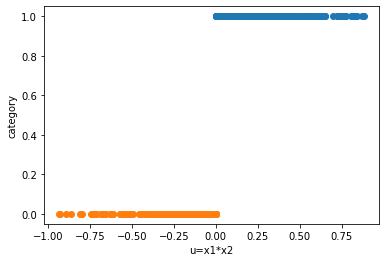

In [31]:
# category 0: 
# for all examples in category 0, 
# we take the product x1*x2
sru0 = srx0[:,0] * srx0[:,1]
# and we assign 1 as a label to this category
sry0 = np.ones(len(sru0))
# same for category 1
sru1 = srx1[:,0] * srx1[:,1]
sry1 = np.zeros(len(sru1))
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)
plt.xlabel('u=x1*x2')
plt.ylabel('category')

And we can do a simple logistic regression in 1D, with $u$ as input.

In [32]:
# merge the examples from the two categories
sru = np.concatenate((sru0, sru1))
# turn the resulting array into an array of shape
# (nexamples, 1), that can be fitted by 
# scikit-learn 
sru = np.c_[sru]
# merge the labels from the two categories
sry = np.concatenate((sry0, sry1))
# create the logistic regression and fit
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sru, sry)

We first plot the results as a function of u. At this stage, the reshaping operations should be clear to you, as we used them above in 2D. If not, feel free to insert printouts in the code cell below to print the shape of the various arrays.

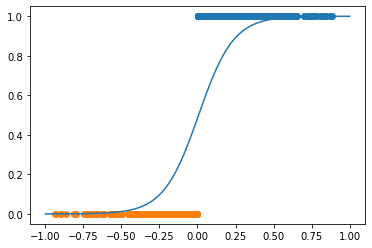

In [33]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

And now, we plot the result a function of $x1$ and $x2$

In [34]:
xmin, xmax, npoints = -1, 1, 100
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = clf.predict_proba(us)
probs[:,1].shape

(10000,)

Text(0, 0.5, 'x2')

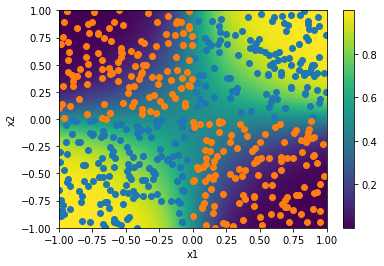

In [35]:
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(srx0[:,0], srx0[:,1])
plt.scatter(srx1[:,0], srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

The classification appears to work well in this simple case, but: 

* depending on the problem, the relation between the two variables can be very complicated, and difficult to infer. 
* this becomes a nightmare in more than two dimensions...

The solution is to make a more complex model, able to adapt to such non-linearities all by itself. And this is what we're going to do now.

## Neural networks with hidden layers: a non-linear classifier 

We're now going to build a simple neural network to classify our samples. 

But first, we need to merge the examples in the two categories into a single sample for training: 


In [36]:
srx = np.concatenate((srx0,srx1))
sry = np.concatenate((sry0,sry1))

The neural network will be an MLPClassifier from scikit-learn, with a single hidden layer containing 50 neurons (remember: always start small). 

For these neurons, we use a ReLU activation function, which almost always works well for neurons in hidden layers.
You can try and replace it with a logistic (sigmoid) activation later on if you want. Learning is an iterative process, and the default number of iterations of 200 was not enough to let it converge. So I increased this number to 10000. 

In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu', max_iter=10000)

mlp.fit(srx,sry)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

To evaluate the performance of the network, we need to build a test sample, just like we did for the training sample:

In [38]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)
x = np.column_stack((x1, x2))
xt0 = x[x1*x2>0]
xt1 = x[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))
print(xt.shape)

(500, 2)


With this test sample, we evaluate the performance of our classifier by computing the accuracy, which is the probability to classify correctly a given example:

In [39]:
from sklearn.metrics import accuracy_score
# predict the category for all test examples
predictions = mlp.predict(xt)
# compare the predictions to the true categories,
# and compute the accuracy:
accuracy_score(yt, predictions)

0.99

The performance seems excellent! Let's plot the probability to belong to category 1 in 2D, together with the test sample:

Text(0, 0.5, 'x2')

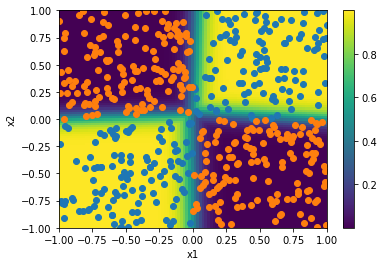

In [40]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
probs = mlp.predict_proba(grid)
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(xt0[:,0], xt0[:,1])
plt.scatter(xt1[:,0], xt1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')


This simple neural network does a great job at capturing the non-linearities of this dataset. 

But how can it do it? How is the hidden layer related to non-linearity? 

## Discussion

First, recall that when there is no hidden layer, the output of the neural net is

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

with 

$$z = w_1 x_1 + w_2 x_2 + b$$

So the separation boundary, which is the location where $\sigma(z)=0.5$, occurs for $z=0$, or equivalently for: 

$$w_1 x_1 + w_2 x_2 + b = 0$$

That's a linear equation describing a line in the $(x_1,x_2)$ plane. To introduce non linearities, we must turn $z$ into a non-linear function of $x_1$ and $x_2$. That's what we first did by changing variables, taking 

$$z= wu + b = w x_1 x_2 + b$$

In a neural net with hidden layers, $z$ is a function of the outputs of the neurons in the hidden layer. Here, we chose for the activation function of these neurons a RELU, which looks like this: 

Text(0, 0.5, 'ReLU(x)')

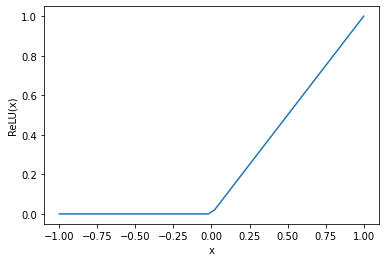

In [41]:
x = np.linspace(-1,1)
# x*(x>0) is equal to x for x>0
# and to 0 otherwise
plt.plot(x, x*(x>0))
plt.xlabel('x')
plt.ylabel('ReLU(x)')

In 2D, The ReLU would look like a rising plane starting at a given line. The non-linarity is coming from the discontinuity at $x=0$. The output of the ReLU neurons is therefore a non-linear function of $x_1$ and $x_2$, and any function of these outputs will thus also be a non-linear function of $x_1$ and $x_2$. 

💡**To make a neural network non-linear, you just need to add at least one hidden layer with a non-linear activation function, like a ReLU or a sigmoid.**